# VISUALISATIONS

Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import json


df = pd.read_csv('cleaned_data.csv')

## Plots showing the outliers for the prices

Number of properties by price, we see that all the data stay on the left meaning there's a lot of outliers on the upper prices.

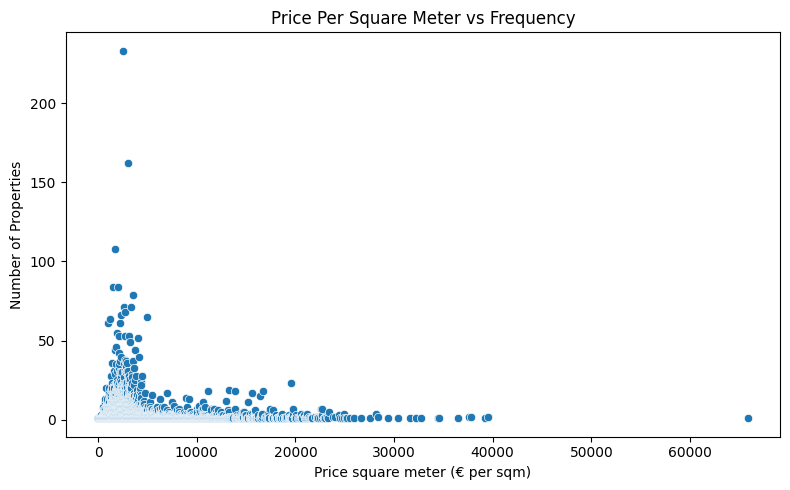

In [3]:
properties_with_outliers = pd.read_csv('cleaned_data_with_outliers.csv')
price_counts = (
    properties_with_outliers
    .groupby('price_square_meter')           # group rows by each unique price
    .size()                     # count how many rows per price
    .reset_index(name='count')  # turn it into a DataFrame with columns ['price','count']
)

#Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency")
plt.tight_layout()
plt.show()



## Analyze Data Without outliers
This graph show the subtype of house (as a type)

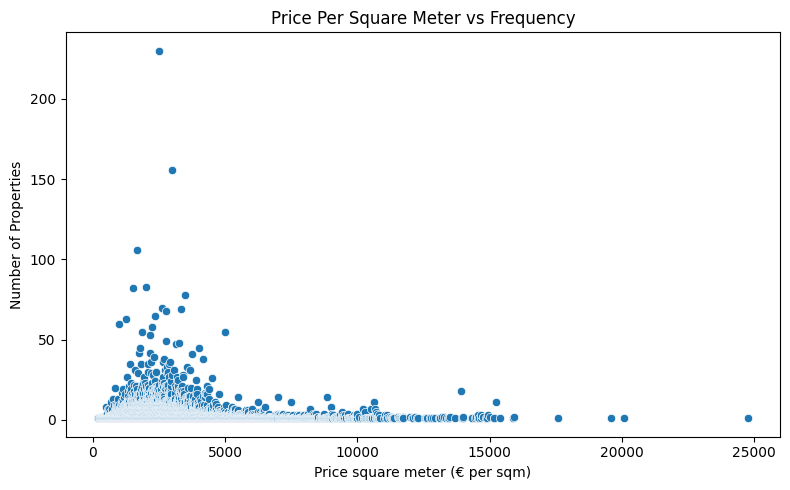

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Scatter of price per square meter BELGIUM - NO OUTLIERS
properties_with_outliers = pd.read_csv('cleaned_data.csv')
price_counts = (
    properties_with_outliers
    .groupby('price_square_meter')           # group rows by each unique price
    .size()                     # count how many rows per price
    .reset_index(name='count')  # turn it into a DataFrame with columns ['price','count']
)

# 3) Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency")
plt.tight_layout()
plt.show()

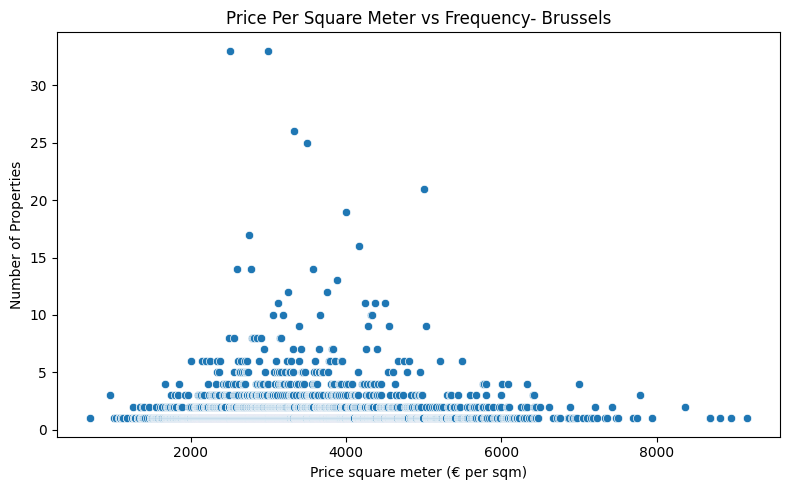

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Scatter of price per square meter - BRUSSELS - WITH NO OUTLIERS

properties_with_outliers = pd.read_csv('cleaned_data.csv')
region_df = properties_with_outliers[properties_with_outliers["region"] == "Brussels"]
price_counts = (
    region_df
    .groupby('price_square_meter')
    .size()
    .reset_index(name='count')
)

# 3) Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency- Brussels")
plt.tight_layout()
plt.show()

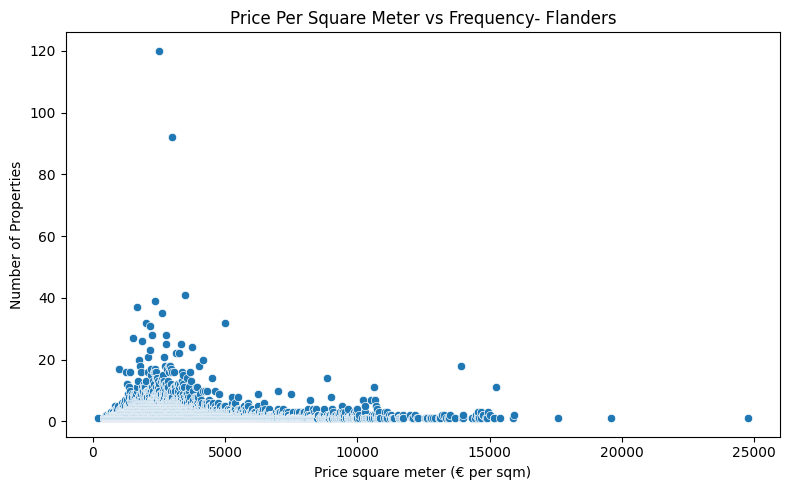

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Scatter of price per square meter - Flanders - WITH NO OUTLIERS
properties_with_outliers = pd.read_csv('cleaned_data.csv')
region_df = properties_with_outliers[properties_with_outliers["region"] == "Flanders"]
price_counts = (
    region_df
    .groupby('price_square_meter')
    .size()
    .reset_index(name='count')
)

# 3) Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency- Flanders")
plt.tight_layout()
plt.show()

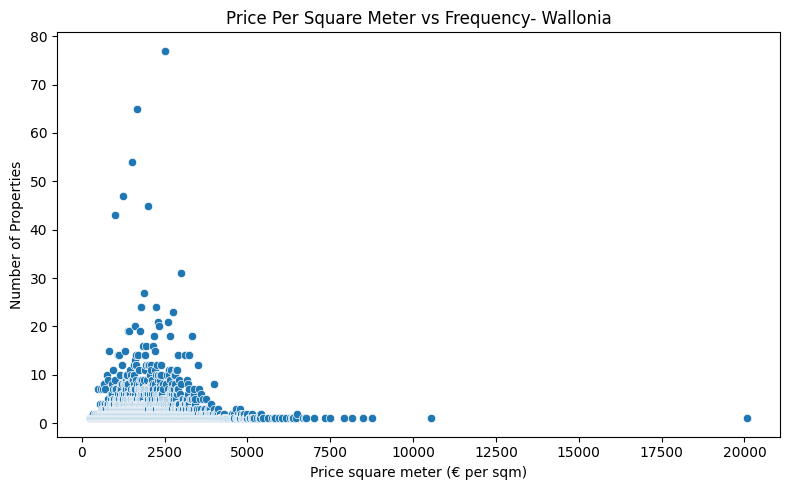

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Scatter of price per square meter - Wallonia - WITH NO OUTLIERS
properties_with_outliers = pd.read_csv('cleaned_data.csv')
region_df = properties_with_outliers[properties_with_outliers["region"] == "Wallonia"]
price_counts = (
    region_df
    .groupby('price_square_meter')
    .size()
    .reset_index(name='count')
)

# 3) Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency- Wallonia")
plt.tight_layout()
plt.show()

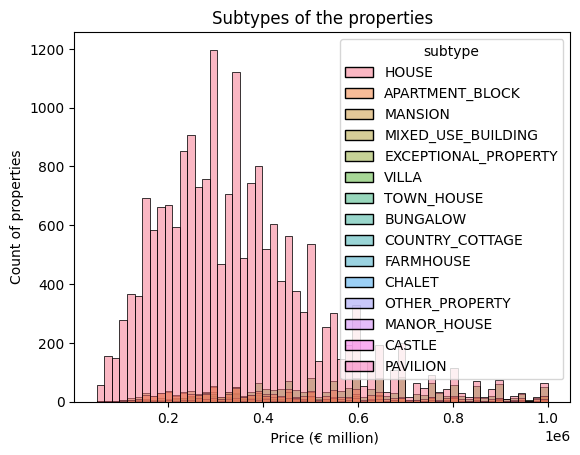

In [8]:
properties = pd.read_csv("cleaned_data.csv")
houses = properties[properties["type"].isin(["HOUSE"])]
sns.histplot(data=houses, x="price", hue="subtype")
plt.title('Subtypes of the properties')
plt.ylabel("Count of properties")
plt.xlabel(" Price (€ million)")
plt.show()


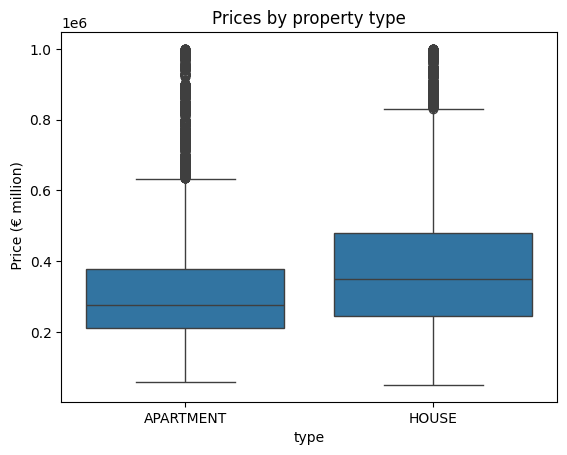

In [9]:
# Prices by property type
def show_boxplot(df):
    sns.boxplot(data=df, x='type', y="price")
    plt.title("Prices by property type")
    plt.ylabel(" Price (€ million)")
    plt.show()

show_boxplot(df)

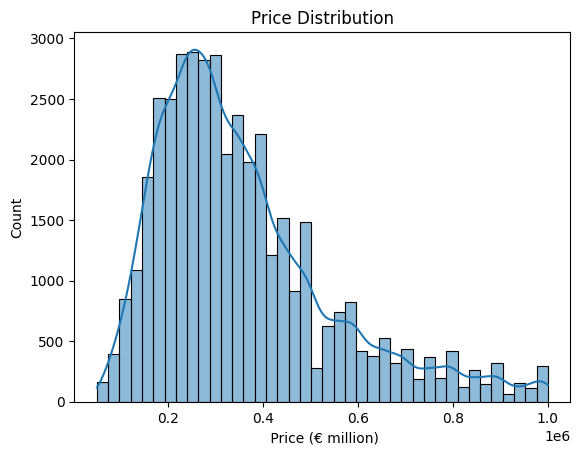

In [10]:
# Price Distribution
def show_price_distribution( df):
    sns.histplot(df['price'], bins=40, kde=True)
    plt.title("Price Distribution")
    plt.xlabel(" Price (€ million)")

    plt.show()

show_price_distribution(df)

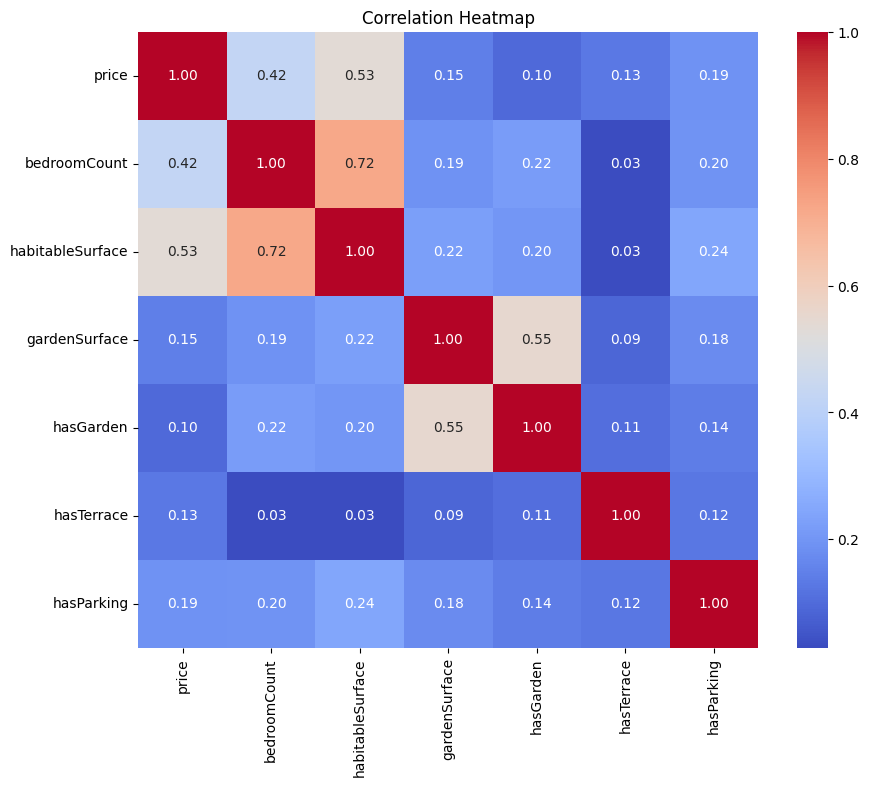

In [11]:
def show_correlation_heatmap(df):
    corr_cols = ['price', 'bedroomCount', 'habitableSurface', 'gardenSurface', 'hasGarden', 'hasTerrace', 'hasParking']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

show_correlation_heatmap(df)

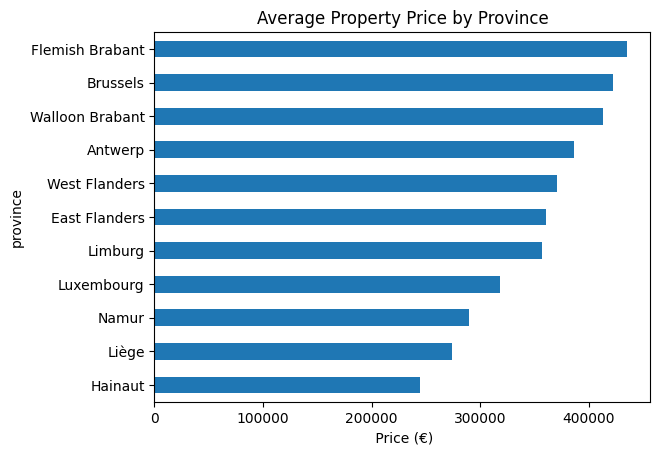

In [16]:
def show_average_price_by_province(df):
    avg_price = df.groupby('province')['price'].mean().sort_values()
    avg_price.plot(kind='barh')
    plt.title('Average Property Price by Province')
    plt.xlabel(" Price (€)")
    plt.show()

show_average_price_by_province(df)

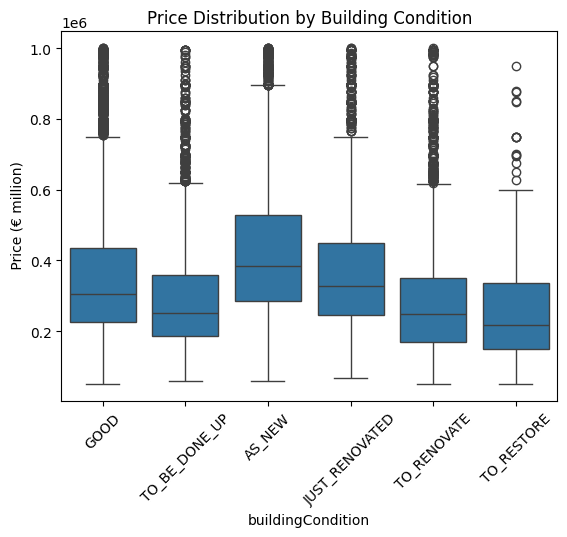

In [17]:
def show_price_by_building_conditions(df):
    sns.boxplot(data=df, x='buildingCondition', y='price')
    plt.xticks(rotation=45)
    plt.title('Price Distribution by Building Condition')
    plt.ylabel(" Price (€ million)")
    
    plt.show()

show_price_by_building_conditions(df)

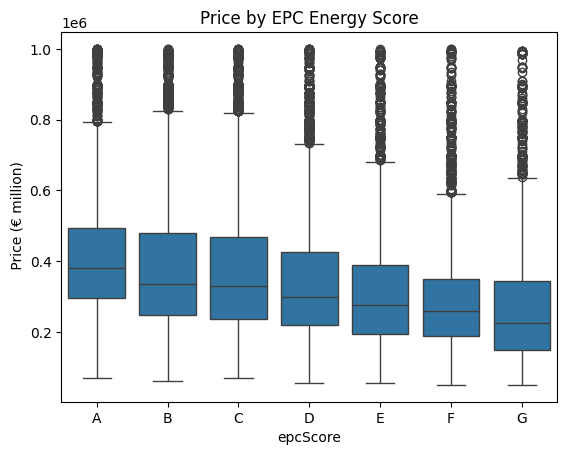

In [14]:
def epc_score_price(df):
    sns.boxplot(data=df, x='epcScore', y='price', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.title('Price by EPC Energy Score')
    plt.ylabel(" Price (€ million)")

    plt.show()

epc_score_price(df)

In [15]:
def interactive_geo_plot_province_avg_sq_mt_price(df):
    with open('belgium_geo.json') as f:
        belgium_geo = json.load(f)

        df_avg_price_province = (
        df[['province', 'price_square_meter']]
        .dropna()
        .groupby('province')
        .agg(avg_price_sq_mt=('price_square_meter', 'mean'), min_price=('price_square_meter', 'min'), max_price=('price_square_meter', 'max'), count=('price_square_meter', 'size'))
        .reset_index()
        )
        fig = px.choropleth(
            df_avg_price_province,
            geojson=belgium_geo,
            locations='province',
            featureidkey='properties.name',
            color='avg_price_sq_mt',
            color_continuous_scale='Viridis',
            hover_name='province',
            hover_data={
                'avg_price_sq_mt': ':.0f',
                'count': True,
                'min_price': ':.0f',
                'max_price': ':.0f'
            },
            title='Average Property Price by Province'
        )

        fig.update_geos(fitbounds="locations", visible=False)
        fig.write_html("geo.html", auto_open=True)

interactive_geo_plot_province_avg_sq_mt_price(df)